In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import geoplot as gplt

import warnings
warnings.filterwarnings('ignore')

# What is needed to be hired as a data scientist? 

![img1](https://uploads-ssl.webflow.com/5e6947ce836a8f4014824e30/604fe709a68de064754c7c85_markus-spiske-466ENaLuhLY-unsplash-p-1080.jpeg)

# Introduction

* The main concern to elaborate this notebook, is based on the hypothesis that there are some characteristics influencing the probabilitity of a person, who have, at different levels, knowledge in data manipulation, be hired as a data scientist.

* Note that is some characteristics beyond individual control, such as age or sex, that can influence the probability of being hired, but we won't focus on these points. Nonetheless, other factors can be relevant to be hired as a data scientist, like the education level or proficiency in Python or R, and it is important for professionals to know what to specialize in.   

* So, to start our analisys, let's take a look at the data. 


In [ ]:
df = pd.read_csv("/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
df.shape

In [ ]:
df.head()

* 2021 Kaggle Machine Learning & Data Science Survey has 42 main questions plus 9 supplementary questions, that results in a database containing 25974 rows and 369 columns (some questions could be answered more than once).


# Let's see just data scients 

In [ ]:
plt.figure(figsize=(18,8))
colors = ['grey', 'cornflowerblue', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
ax = sns.countplot(df['Q5'], order = df['Q5'].value_counts().iloc[:15].index, palette = colors)
ax.set(title = 'Current Role', xlabel = '', ylabel = '')
ax.annotate("↱ Look, we have 3616 data scientists", (1, 3650), ha="left", va="bottom")
for item in ax.get_xticklabels():
    item.set_rotation(90)

plt.show()

# How old are they and what is their gender?

In [ ]:
import plotly.express as px
data_scientist = df[df['Q5']=='Data Scientist']

fig = px.histogram(data_scientist, x="Q1", color = "Q2", labels = {'Q2': 'Sex', 'Q1': 'Age'}, title = 'Age and Gender of Data Scientists').update_xaxes(categoryorder='total descending')
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

* Note that, for all age groups, most data scientists are man. Furthermore, about 59% of data scientists are between 22 and 34 years old. 

* From the age of 40, the gap between man and woman increases, so that, in the age group 55-59, the ratio is one woman to twenty one men, while in 25-29, the ratio was from one woman to about five men.  
    
 

# What are their education levels?

In [ ]:
df_q4 = data_scientist['Q4'].value_counts()
fig = px.pie(df_q4, values=df_q4.values, names=df_q4.index, title='Education Level of Data Scientists')
fig.show()



* Analyzing the education level of data scientists, it's possible to observe that more than 80% of this professional have at least Bachelor's degree. So, probably, this variable will have a significant impact in our estimation. 

* The proportion of professionals who don't have formal education past high school is practically insignificant, only 0.83% of the base.  



## Where are they from?

In [ ]:
%%capture
pip install pyecharts==1.7.1

In [ ]:
columns = [3,5]
data_scientist = data_scientist.replace("United States of America", "United States")
data_map2 = data_scientist.iloc[:,columns]
data_map2 = data_map2.groupby('Q3').count()
data_map2 = pd.DataFrame(data_map2)
data_map2

country = list(data_map2.index)
total_scientist = list(data_map2['Q5'])

from pyecharts.charts import Map,Geo
from pyecharts import options as opts
from pyecharts.globals import ThemeType

list1 = [[country[i],total_scientist[i]] for i in range(len(country))] 
map_1 = Map(init_opts=opts.InitOpts(width='1000px', height='460px',theme=ThemeType.VINTAGE)) 
map_1.add('Total Data Scientist', 
 list1,
 maptype='world',
 is_map_symbol_show=False)
map_1.set_series_opts(label_opts=opts.LabelOpts(is_show=False)) 
map_1.set_global_opts(
visualmap_opts=opts.VisualMapOpts(max_=1100000,is_piecewise=True,pieces=[
 {'min': 200},
 {'min': 150, 'max': 199},
 {'min': 100, 'max': 149},
 {'min': 50, 'max': 99},
 {'max': 49},]),
 title_opts=opts.TitleOpts(
 title='Data Scientists Around the World',
 subtitle='2021 Kaggle Machine Learning & Data Science Survey',
 pos_left='center',
 padding=0,
 item_gap=2,
 title_textstyle_opts= opts.TextStyleOpts(color='black',
 font_weight='bold',
 font_family='Zebrazil',
 font_size=30), 
 subtitle_textstyle_opts= opts.TextStyleOpts(color='darkgrey',
 font_weight='bold',
 font_family='Zebrazil',
 font_size=13)), 
 legend_opts=opts.LegendOpts(is_show=False))
map_1.render_notebook()



* Here, we will expose our estimation strategy. For the estimation that will be presented bellow, we chose to analyze the dynamics of countries that have at least 100 responses in the survey. Therefore, the countries are: India, USA, Brazil, Russia and France. 

* So, we want to compare individuals who have some knowledge in data manipulation, but isn't current employed with those who is employed as a data scientist. We hope that some characteristics may exert influences of different magnitudes in different countries and this we will investigate.  </li> 



## Base for estimation

In [ ]:
df_estimation = df[((df['Q5']=='Currently not employed') | (df['Q5']=='Data Scientist')) & ((df['Q3']=='India') | (df['Q3']=='United States of America') | (df['Q3']=='Brazil') | (df['Q3']=='Russia') | (df['Q3']=='France'))]
not_employed = df_estimation[(df_estimation['Q5']=='Currently not employed')]
ds = df_estimation[(df_estimation['Q5']=='Data Scientist')]

plt.figure(figsize=(10, 10))
sns.set(style="darkgrid")

## Selecting just data scientists
df_table = df_estimation.groupby('Q3')['Q5'].size().reset_index()
bar1 = sns.barplot(x='Q3',  y='Q5', data = df_table, color='darkblue', order=df_table.sort_values('Q5', ascending= False).Q3)

## Now selecting current not employed
df_table2 = df_estimation[df_estimation['Q5']=='Currently not employed']
df_table2 = df_table2.groupby('Q3')['Q5'].size().reset_index()
bar2 = sns.barplot(x="Q3", y="Q5", data=df_table2, estimator=sum, ci=None,  color='lightblue', order=df_table.sort_values('Q5', ascending= False).Q3)

# Adding legends and changing xaxis and yaxis
top_bar = mpatches.Patch(color='darkblue', label='Data Scientist')
bottom_bar = mpatches.Patch(color='lightblue', label='Currently not employed')
plt.legend(handles=[top_bar, bottom_bar])
plt.title('Count of Data Scientists and Not Employed')
plt.xlabel('Countries')
plt.ylabel('Count')

# show the graph
print('We have', len(not_employed), 'people current not employed of the countries discussed above and this will be the 0 in our dummy.')
print('Besides, there are', len(ds), 'data scientists of the same countries and this will be the 1 in our dummy.')
print('So, we have', len(df_estimation), 'data scientists and current not employed from India, USA, Brazil, Russia and France. Take a look at the graph:')
print("")
plt.show()



* The database of data scientists and current not employed of India and USA corresponds to about 81% of total base. This limits us somewhat, because the reduced amount of data from other countries compromises the degree of freedom of our estimates, so the selection of variables should be reduced. We will have a more detailed discussion below. 



In [ ]:
df_estimation = df_estimation.sort_values(by='Q1', ascending=True)
fig = px.box(df_estimation, x="Q3", y="Q1", title = "Age of Data Scientist by Country", labels = {'Q1': 'Age', 'Q3': 'Country'}).update_xaxes(categoryorder='total descending')
fig.show()


* Note that the distribution of age in India is divergent from other countries beacuse the data scientists are younger in India. It appears that the distribution of age is similar between USA and France, and between Brazil and Russia. 



* Now, to introduce the main motivation of this work, look the qualifiquation required of some linkedin jobs...


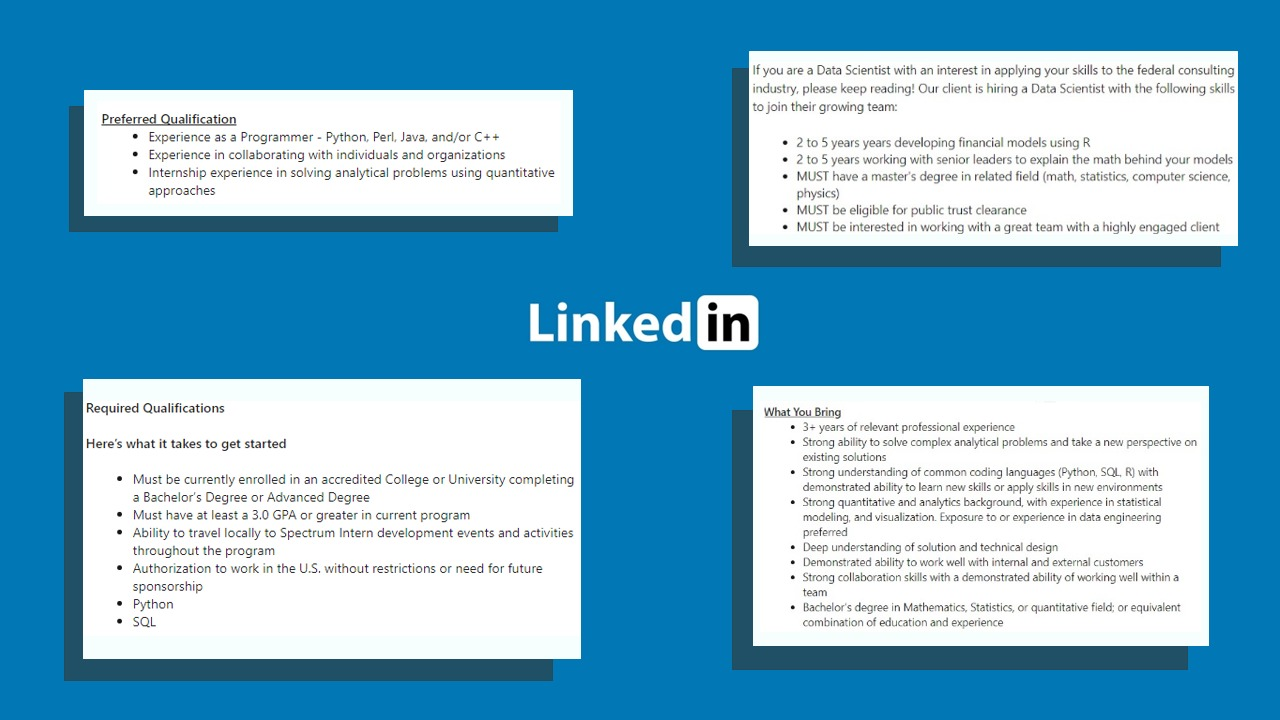

 

* All the required qualifications presented above were extracted from linkedin jobs. Note that there are a variety of programming languages required for different job opportunities. So, we have a hypothesis that, depending on which country a person lives, specializing in certain programming languages can make it easier to get a job as a data scientist.

* To investigate this hypotesis, we will estimate a Probit Model, to observe what characteristics impacts more on the fact of being or not a data scientist.  



# Estimation



* As discussed above, we will estimate a Probit Model, the independent variables are age, sex (1 if man, 0 otherwise), scholarity (1 if the person have Bachelor's degree or more than that, 0 otherwise), experience (1 if the individual have more than 2 years of experience writting a code, 0 otherwise) and, like discussed previously, we will use just dummies for Python and R, because some countries have little data, the degree of freedom of the estimation would be compromised if we have used the other programming languages as dummies in our estimation. 

* The dependent variable will be data_scientist (1 if the current role of person is data scient, 0 if it's not current employed).   



In [ ]:
from statsmodels.iolib.summary2 import summary_col
import statsmodels.formula.api as smf

# Database 

df_reg = df_estimation.iloc[:,1:20]
df_reg['age'] = np.where((df_reg['Q1']== '18-21') | (df_reg['Q1']== '22-24') | (df_reg['Q1']== '25-29') | (df_reg['Q1']== '30-34') | (df_reg['Q1']== '35-39') | (df_reg['Q1']== '40-44'), 1, 0)
df_reg['sex'] = np.where(df_reg['Q2']=='Man', 1, 0)
df_reg['scholarity'] = np.where((df_reg['Q4']=='Bachelor’s degree') | (df_reg['Q4']=='Master’s degree') | (df_reg['Q4']=='Doctoral degree'), 1, 0)
df_reg['experience'] = np.where((df_reg['Q6']=='I have never written code') | (df_reg['Q6']=='< 1 years') | (df_reg['Q6']=='1-2 years'), 0, 1)
df_reg = df_reg.drop(['Q1', 'Q2', 'Q4', 'Q6'], 1)

# India 

df_reg_India = df_reg[df_reg['Q3']=='India']
df_reg_India = pd.get_dummies(df_reg_India)
df_reg_India = df_reg_India.rename(columns = {'Q5_Data Scientist': 'India', 'Q7_Part_1_Python': 'Python', 'Q7_Part_2_R': 'R'}, inplace = False)
formula1 = 'India~1 + age + sex + scholarity + experience + Python + R'
model1 = smf.probit(formula1, data = df_reg_India).fit(disp = 0)

# USA 

df_reg_USA = df_reg[df_reg['Q3']=='United States of America']
df_reg_USA = pd.get_dummies(df_reg_USA)
df_reg_USA = df_reg_USA.rename(columns = {'Q5_Data Scientist': 'USA', 'Q7_Part_1_Python': 'Python', 'Q7_Part_2_R': 'R'}, inplace = False)

formula2 = 'USA~1 + age + sex + scholarity + experience + Python + R'
model2 = smf.probit(formula2, data = df_reg_USA).fit(disp = 0)

# BR 

df_reg_BR = df_reg[df_reg['Q3']=='Brazil']
df_reg_BR = pd.get_dummies(df_reg_BR)
df_reg_BR = df_reg_BR.rename(columns = {'Q5_Data Scientist': 'Brazil', 'Q7_Part_1_Python': 'Python', 'Q7_Part_2_R': 'R'}, inplace = False)

formula3 = 'Brazil~1 + age + sex + scholarity + experience + Python + R'
model3 = smf.probit(formula3, data = df_reg_BR).fit(disp = 0)

# Russia

df_reg_Russia = df_reg[df_reg['Q3']=='Russia']
df_reg_Russia = pd.get_dummies(df_reg_Russia)
df_reg_Russia = df_reg_Russia.rename(columns = {'Q5_Data Scientist': 'Russia', 'Q7_Part_1_Python': 'Python', 'Q7_Part_2_R': 'R'}, inplace = False)

formula4 = 'Russia~1 + age + sex + scholarity + experience + Python + R'
model4 = smf.probit(formula4, data = df_reg_Russia).fit(disp = 0)

# France 

df_reg_France = df_reg[df_reg['Q3']=='France']
df_reg_France = pd.get_dummies(df_reg_France)
df_reg_France = df_reg_France.rename(columns = {'Q5_Data Scientist': 'France', 'Q7_Part_1_Python': 'Python', 'Q7_Part_2_R': 'R'}, inplace = False)

formula5 = 'France~1 + age + sex + scholarity + experience + Python + R'
model5 = smf.probit(formula5, data = df_reg_France).fit(disp = 0)

dictionary={'No. observations' : lambda x: f"{int(x.nobs):d}"}

print(summary_col([model1, model2, model3, model4, model5],
                 float_format='%0.2f',
                 stars = True,
                 info_dict=dictionary))



* The results found to France and Russia don't presented a good fit, so we can't have good insights about this countries data scientists dynamics. This probably occurs because ther is a limited amount of data. Furthermore, the variables age and sex acts like control variables in this estimation, because they are characteristics beyond individual control and we don't want to analyse their impact on the final result. 

* The variables scholarity and experience has a less impact in India compared to USA and Brazil. This means that, a person who is starting in this area, have more probability to get a job as a data scientist in India than in USA and Brazil. This colaborate with the boxplot presented above, in general, Indian data scientists are younger compared to other countries.       
* The programming language Python has significant impact in the fact of being a data scientist in Brazil and USA. In Brazil, this programming language consolidates as a very important factor and, for a person that wants to join this area, according to the estimation, it is recommended to specialize in Python. In the USA, despite Python also be relevant as the main programming language, a person who eventually knows R, also has considerable space in the labor market. Note that in India, only the variable related to R was significant, so we can't compare with Python, but even so, for a person that is starting in this area, R is a good programming langugage to specialize in.  




* Let's see what is the perception of this data scientists about what aspirants should learn first.   


In [ ]:
df_perception = df_estimation[df_estimation['Q5']=='Data Scientist']
df_india = df_perception[df_perception['Q3']=='India']
df_usa = df_perception[df_perception['Q3']=='United States of America']
df_br = df_perception[df_perception['Q3']=='Brazil']
df_russia = df_perception[df_perception['Q3']=='Russia']
df_france = df_perception[df_perception['Q3']=='France']

fig = plt.figure(figsize=(25,15))

ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax1 = sns.countplot(df_india['Q8'], order = df_india['Q8'].value_counts().index).set(title = 'India', xlabel = '', ylabel = '')
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax2 = sns.countplot(df_usa['Q8'], order = df_usa['Q8'].value_counts().index).set(title = 'USA', xlabel = '', ylabel = '')
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax3 = sns.countplot(df_br['Q8'], order = df_br['Q8'].value_counts().index).set(title = 'Brazil', xlabel = '', ylabel = '')
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax4 = sns.countplot(df_russia['Q8'], order = df_russia['Q8'].value_counts().index).set(title = 'Russia', xlabel = '', ylabel = '')
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
ax5 = sns.countplot(df_france['Q8'], order = df_france['Q8'].value_counts().index).set(title = 'France', xlabel = '', ylabel = '')

plt.show()



* Although R consolidates as a programming language with significant impact in some countries, like India and USA, note that the perception of data scientists in all countries is: "Learn Python!!!" 



# Estimation for all countries

* We will use Random Forest Classifier as an alternative model for all countries estimation. Note that here, we use the same variables used in the Probit Model, as a basis for comparision. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data_scientist_general = df[(df['Q5']=='Data Scientist') | (df['Q5']=='Currently not employed')]
data_scientist_general['age'] = np.where((data_scientist_general['Q1']== '18-21') | (data_scientist_general['Q1']== '22-24') | (data_scientist_general['Q1']== '25-29') | (data_scientist_general['Q1']== '30-34') | (data_scientist_general['Q1']== '35-39') | (data_scientist_general['Q1']== '40-44'), 1, 0)
data_scientist_general['sex'] = np.where(data_scientist_general['Q2']=='Man', 1, 0)
data_scientist_general['scholarity'] = np.where((data_scientist_general['Q4']=='Bachelor’s degree') | (data_scientist_general['Q4']=='Master’s degree') | (data_scientist_general['Q4']=='Doctoral degree'), 1, 0)
data_scientist_general['experience'] = np.where((data_scientist_general['Q6']=='I have never written code') | (data_scientist_general['Q6']=='< 1 years') | (data_scientist_general['Q6']=='1-2 years'), 0, 1)
data_scientist_general = data_scientist_general.drop(['Q1', 'Q2', 'Q4', 'Q6'], 1)

df_reg_general = data_scientist_general.drop(columns=['Q3'])
df_reg_general = pd.get_dummies(df_reg_general)
df_reg_general = df_reg_general.rename(columns = {'Q5_Data Scientist': 'DS', 'Q7_Part_1_Python': 'Python', 'Q7_Part_2_R': 'R'}, inplace = False)

clf = RandomForestClassifier(min_samples_leaf=60, random_state=25)

entradas = df_reg_general[['age', 'sex', 'scholarity', 'experience', 'Python', 'R']]

x = pd.DataFrame(entradas)
y = df_reg_general['DS']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 25)

clf.fit(X_train, Y_train)

rdf = clf.predict(X_test)
acc = accuracy_score(Y_test,rdf)

print("Random Forest Accuracy:", acc)

In [ ]:
importance = clf.feature_importances_

list_1 = []
list_2 = []
for i,j in zip(importance,entradas.columns):
    list_1.append(str(j))
    list_2.append(i)

df_name = pd.DataFrame(list_1,columns=["Column"])
df_number = pd.DataFrame(list_2,columns=["Importances"])

df_ranking = pd.concat([df_name, df_number], axis=1)
df_final = df_ranking.sort_values("Importances",ascending=False).reset_index(drop=True)
df_final.Column = df_final.Column.astype(str)


f, ax = plt.subplots(figsize=(15, 10))

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
sns.barplot(x="Column", y="Importances", data=df_final, palette=colors).set(title = 'Feature Importances', xlabel = '', ylabel = '')

plt.show()

* Our main concern isn't focused in the accuracy of the model. Probabilly, including other features and adjusting it, we could obtain better accuracy. But, see the feature importances presented in the graph above.
* Note that, experience remais the most important variable in the model. However, now R consolidates as a programming language with more importance in our model. Let's see a possible reason why this happens.

In [ ]:
import plotly.graph_objects as go

df_Python = df[df['Q7_Part_1']=='Python']
df_Python = df_Python['Q5'].value_counts(normalize=True).mul(100).sort_index(ascending=True).round(2)

df_R = df[df['Q7_Part_2']=='R']
df_R = df_R['Q5'].value_counts(normalize=True).mul(100).sort_index(ascending=True).round(2)

fig = go.Figure(data=[go.Table(
    header=dict(values=['Current Role', 'Python', 'R'],
                font=dict(color='white', size=12),
                line_color='darkslategray',
                fill_color='darkgrey',
                align='left'),
    cells=dict(values=[df_R.index, 
                       df_Python.values,
                      df_R.values],
               line_color='darkslategray',
               fill_color='whitesmoke',
               align='left'))
])

fig.show()

* In relative terms, R (21.37%) is more present in the profession of data scientist than Python (15.44%). It's as if Python is a little more distributed among the other occupations. In general, both programming languages are import to enter the labor market. 


* **Work still in progress! Comments apreciated!**
